# Media movil simple (SMA)

La **media móvil simple (SMA)** es una herramienta de análisis técnico usada en trading para suavizar las fluctuaciones de los precios y así identificar tendencias más claramente y probablemente una de las más comunes para detectar las tendencias del mercado.

### ¿Para qué sirve?
* **Identificar tendencias**: Si la SMA sube, hay una tendencia alcista. Si baja, hay una tendencia bajista.
* **Generar señales de compra o venta**:
    * **Compra**: Cuando el precio cruza la SMA de 50 periodos cruza hacia arriba la SMA de 200 periodos.
    * **Venta**: Cuando el precio cruza la SMA de 50 periodos cruza hacia abajo la SMA de 200 periodos. 

### Fórmula de la SMA


$$ \text{SMA} = \frac{P_1 + P_2 + P_3 + \ldots + P_n}{n} $$

Donde:

* $P1,P2,P3,...,Pn$ son los precios de cierre de los últimos 𝑛 periodos.
* $n$ es el número total de periodos que estás considerando.

Ahora veremos su desarrollo usando Python. 


In [19]:
import yfinance as yf # para extraer datos financieros de Yahoo.

import pandas as pd # Para la manipulación de datos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.

import warnings  # Para gestionar los mensajes de advertencia.
warnings.filterwarnings('ignore')


1. Empezamos descargando los datos de Yahoo Finance, en este ejemplo usaremos los datos de Apple.

In [20]:
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


2. Damos un vistazo a los datos, en este caso usaremos el precio de cierre ajustado, pero también se puede usar el precio de cierre.


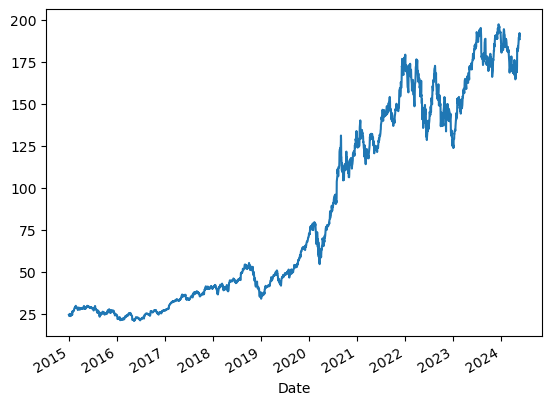

In [21]:
data['Adj Close'].plot();

3. Creamos una función que recibe un DataFrame y una lista de ventanas temporales y devuelve el DataFrame con las medias móviles simples calculadas en una nueva columna. La función **Rolling** de Pandas nos permite calcular la media móvil simple de una serie temporal.

In [22]:
def SMA(df, *windows):
    for window in windows:
        sma = pd.Series(
            pd.Series.
            rolling(
                df['Adj Close'], window)
                .mean(), 
                name='SMA_' + str(window)
            )
        df = df.join(sma)

    
    return df

4. Calcular la media móvil simple de 50 y 200 días, y vemos dos nuevas conlumnas con las medias móviles de 50 y 200 periodos. 


In [23]:
sma_50_200 = SMA(data,50,200)
sma_50_200


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
Date,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,173.905672,180.298211
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,174.316497,180.302611
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400,174.713177,180.359218


5. Creamos una funcion para poder graficar, en esta ocación usaremos Matplotlib. Esta función se encarga de iterar cada SMA. 

In [24]:
def plot_data_SMA(df):
    plt.figure(figsize=(10,5))
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'SMA' in column])
    plt.plot(df['Adj Close'], label='Adj Close')


    plt.title(f'Simple Moving Average of {ticker} {sma_periods}')

    sma_columns = [col for col in df.columns if 'SMA' in col]

    for column in sma_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

6. Por ultimo, llamamos a la función y graficamos y bingo 😎, tenemos la SMA para AAPL de 50 y 200 periodos de una manera sencilla, claro se puede mejorar y hacer mucho mas robusto el código, de acuerdo a las necesidades. 

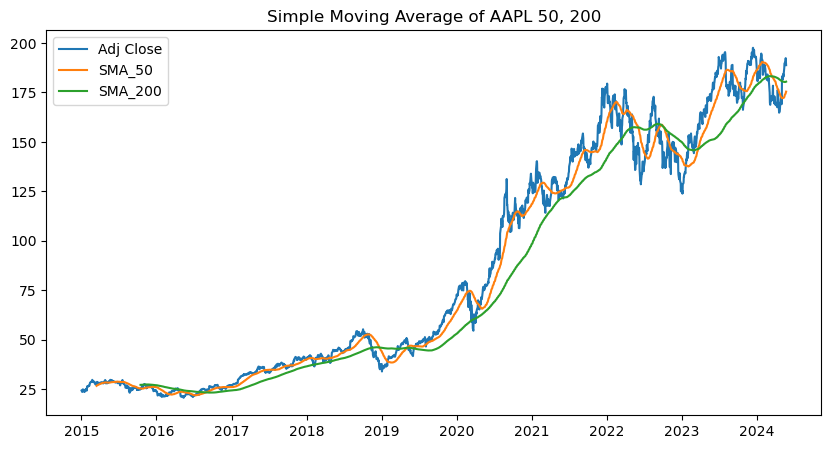

In [25]:
plot_data_SMA(sma_s)

In [26]:
def EMA(df, *windows):
    for window in windows:
        ema = pd.Series(
            pd.Series.
            ewm(
                df['Adj Close'], window)
                .mean(), 
                name='EMA_' + str(window)
            )
        df = df.join(ema)

    
    return df

In [27]:
def plot_data_EMA(df):
    plt.figure(figsize=(10,5))
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'EMA' in column])
    plt.plot(df['Adj Close'], label='Price')


    plt.title(f'Simple Moving Average of {ticker} {sma_periods}')

    sma_columns = [col for col in df.columns if 'EMA' in col]

    for column in sma_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

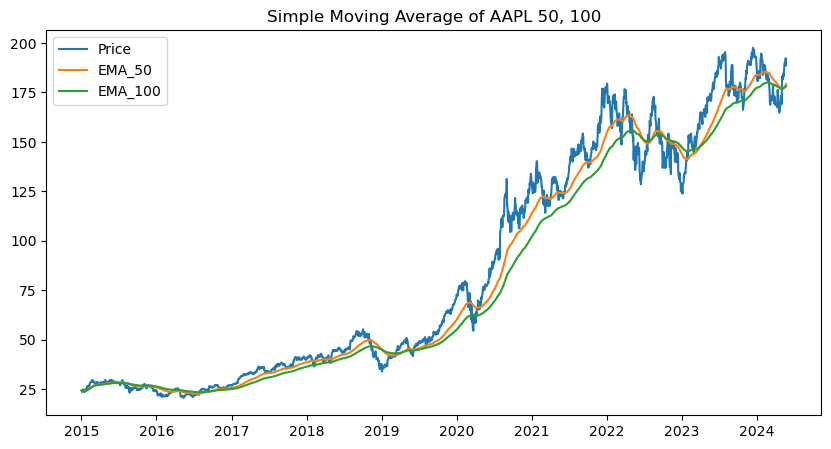

In [28]:
exponencial = plot_data_EMA(EMA(data,50,100))